In [4]:
import numpy as np  
import matplotlib.pyplot as plt 
import scipy.signal as sp
import numpy.linalg as nplin
from gekko import GEKKO

from scipy.integrate import odeint
from scipy.interpolate import interp1d
from scipy.signal import place_poles
from scipy.signal import find_peaks
from scipy.linalg import solve_continuous_are


from plotfunc import plot_sets

# 2


In [2]:
def model_mass(x,t):
    u=1

    x1=x[0]
    x2=x[1]

    dx1=x1*np.log(x2)
    dx2=-x2*np.log(x1)+x2*u

    return [dx1,dx2]

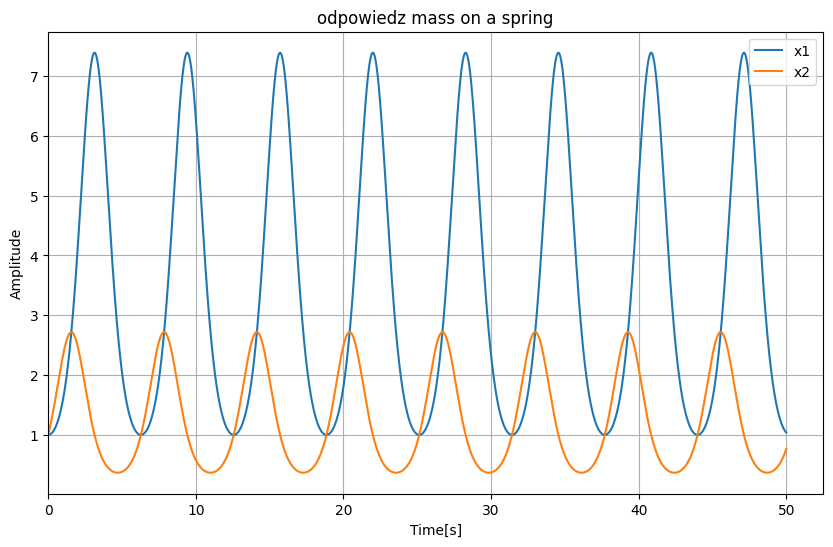

In [3]:
t= np.arange(0,50,0.01)

res_nonlinear=odeint(model_mass,[1,1],t)

plot_sets("odpowiedz mass on a spring",[t,res_nonlinear[:,0],'x1'],[t,res_nonlinear[:,1],'x2'])

In [4]:
def model_mass_new(z,t):
    u=1

    z1=z[0]
    z2=z[1]

    dx1=z2
    dx2=-z1+u

    return [dx1,dx2]

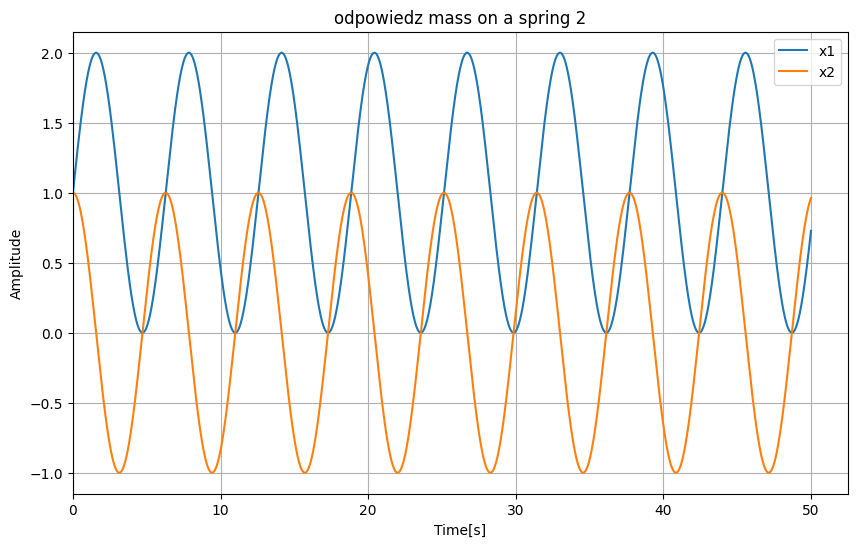

In [5]:
t= np.arange(0,50,0.01)

res_linear=odeint(model_mass_new,[1,1],t)

plot_sets("odpowiedz mass on a spring 2",[t,res_linear[:,0],'x1'],[t,res_linear[:,1],'x2'])

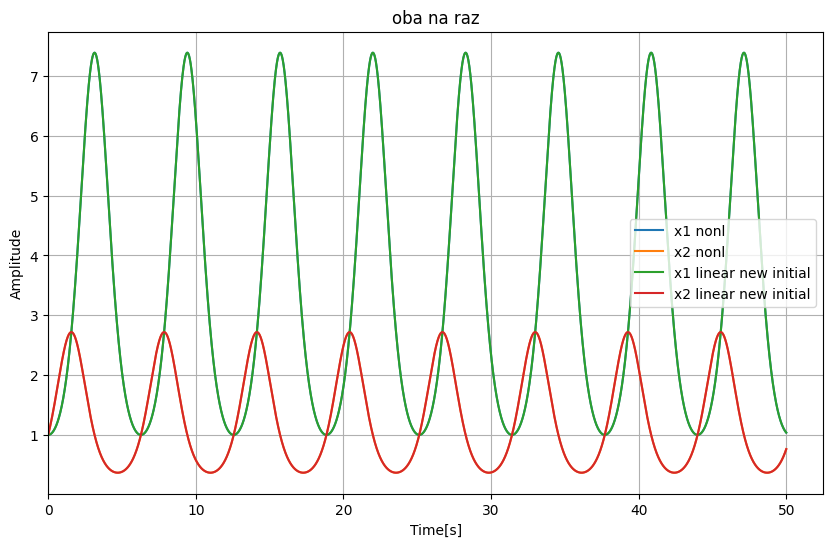

In [8]:
x0=[np.log(1),np.log(1)]

res_linear_new_initial=odeint(model_mass_new,[np.log(1),np.log(1)],t)

nowa_odpowiedz=np.exp(res_linear_new_initial)

plot_sets("oba na raz",[t,res_nonlinear[:,0],'x1 nonl'],[t,res_nonlinear[:,1],"x2 nonl"],[t,nowa_odpowiedz[:,0],"x1 linear new initial"],[t,nowa_odpowiedz[:,1],"x2 linear new initial"])

# 5

In [29]:
#pendulum parameters 

m=9
g=10
l=1
J=1
d=0.5

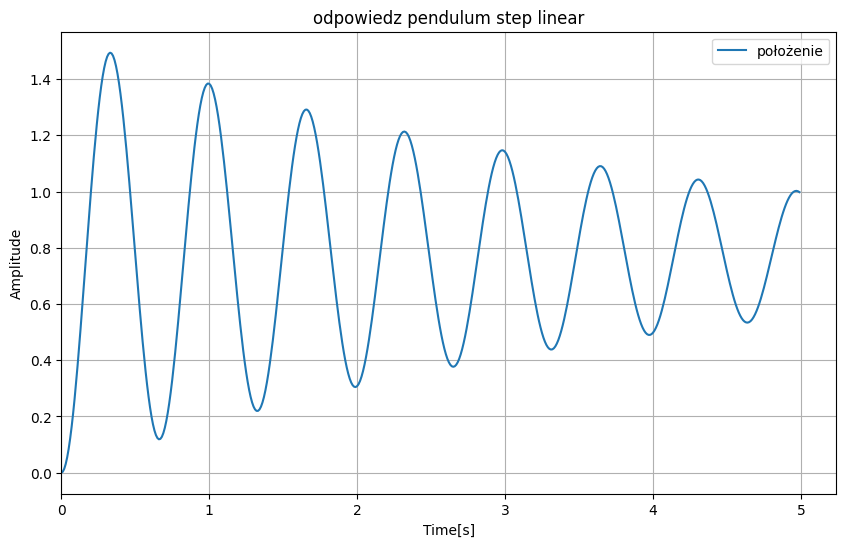

In [30]:
#5.1
#linear pendulum model 

A=np.array([[0,1],
            [-m*g*l/J,-d/J]])
B=np.array([[0],[1/J]])
C=[0,1]

pendulum_model_linear=sp.StateSpace(A,B,C,0)

t=np.arange(0,5,0.01)

u0=np.full(len(t),1)

u=np.zeros((len(t),5))
i=0

for el in [0,5,20,45*np.sqrt(2),70]:
    u[:,i]=np.full(len(t),el)
    i+=1

#print(u[:,1])

t_res,_,state0=sp.lsim(pendulum_model_linear,u[:,0],T=t)
t_res,_,state1=sp.lsim(pendulum_model_linear,u[:,1],T=t)
t_res,_,state2=sp.lsim(pendulum_model_linear,u[:,2],T=t)
t_res,_,state3=sp.lsim(pendulum_model_linear,u[:,3],T=t)
t_res,_,state4=sp.lsim(pendulum_model_linear,u[:,4],T=t)


plot_sets('odpowiedz pendulum step linear',[t_res,state4[:,0],'położenie'])


In [ ]:
#5.1
#non-linear pendulum model

def nonlinear_pendulum_model(x,t,u):
    x1=x[0]
    x2=x[1]

    dx1=x2
    dx2=1/J * u -d/J*x2-m*g*l/J*np.sin(x1)

    return [dx1,dx2]


In [35]:
res_pendulum_nonlinear=odeint(nonlinear_pendulum_model,[0,0],t,args=(70,))

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.